<a href="https://colab.research.google.com/github/fitsumM12/Data-Science/blob/main/building_digit_recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# we use simple convolutional neural network to recoginize the digit
# plus, the dataset is from MNIST data

# import the neccessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load MNIST dataset that contain the grayscale of digit(image) which are 28x28 pixel
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalize the pixels
train_images, test_images = train_images/255.00, test_images/255.00

In [4]:
# Build the models
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape= (28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10) #  we have 10 digit

])

In [5]:
# Compile the model by specifying the loss function, optimizer, and evaluation metrics
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
# let see the summary of the models
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [7]:
# train the model
history = model.fit(train_images, train_labels, epochs = 10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 73s 38ms/step - loss: 0.1382 - accuracy: 0.9577 - val_loss: 0.0471 - val_accuracy: 0.9850
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0465 - accuracy: 0.9859 - val_loss: 0.0346 - val_accuracy: 0.9892
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0338 - accuracy: 0.9895 - val_loss: 0.0306 - val_accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0267 - accuracy: 0.9913 - val_loss: 0.0383 - val_accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0255 - val_accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0312 - val_accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0454 -

In [8]:
test_loss, test_accuracy = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


313/313 - 3s - loss: 0.0363 - accuracy: 0.9911 - 3s/epoch - 9ms/step
Test accuracy: 99.11%


In [9]:
predictions = model.predict(test_images[..., np.newaxis])


313/313 [==============================] - 3s 11ms/step


ValueError: ignored

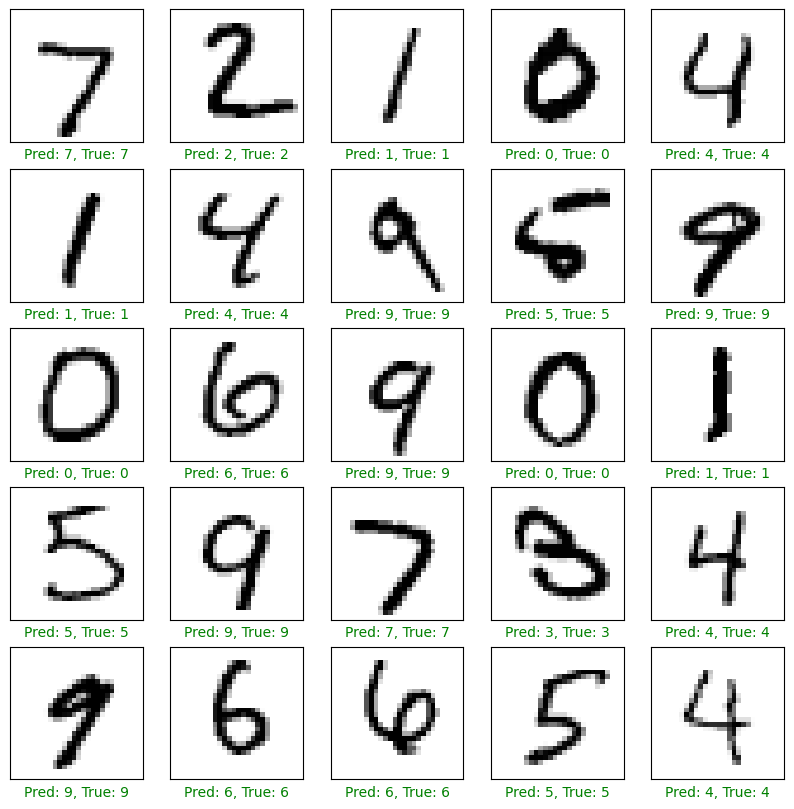

In [10]:
num_test_images = test_images.shape[0]

plt.figure(figsize=(10, 10))
for i in range(num_test_images):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}", color=color)
plt.show()